# TIme series analysis on the data International Ariline passengers from 1940 To 1960

In [3]:
# import libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

ModuleNotFoundError: No module named 'statsmodels'

In [1]:
# data fetch from github 
import pandas as pd
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [2]:
# plot the data
plt.figure(figsize=(10,6))
plt.plot(df['Month'],df['#Passengers'])
plt.xlabel('Month')
plt.ylabel('Number of Air Passengers')
plt.title("Air Passengers Data")
plt.show()

NameError: name 'plt' is not defined

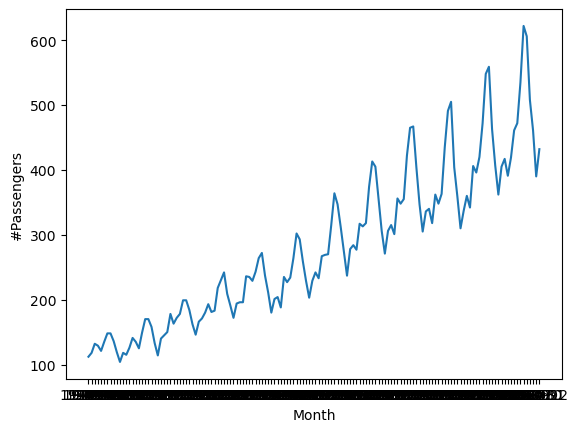

In [30]:
# plot by seaborn

sns.lineplot(x='Month',y='#Passengers',data=df)
plt.show()








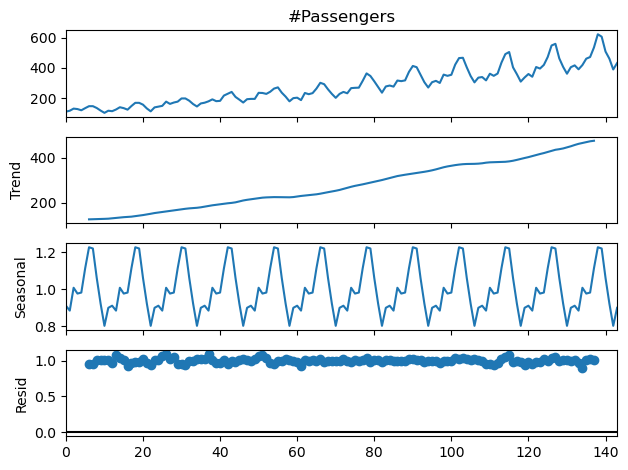

In [31]:
# decompose the data into trend seasonality and residual
df = seasonal_decompose(df['#Passengers'],model='multiplicative', period=12)
df.plot()
plt.show()

"""
This code snippet is calling the `head()` function on the `seasonal_decompose` object. 
The `head()` function is used to display the first few rows of the dataset. 

With this dataset, we can perform various time series data analysis tasks such as:
- Decomposing the time series into its trend, seasonality, and residual components.
- Analyzing the trend to understand the overall direction of the data.
- Analyzing the seasonality to identify recurring patterns or cycles.
- Analyzing the residual component to identify any remaining patterns or anomalies.
- Forecasting future values based on the historical data.
- Evaluating the performance of time series models and selecting the best model for prediction.
"""

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
model = SARIMAX(df['#Passengers'], order=(p, d, q), seasonal_order=(P, D, Q, m))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.get_forecast(steps=n)

# Get the predicted values and confidence intervals
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['#Passengers'], label='Actual')
plt.plot(predicted_values.index, predicted_values, label='Forecast')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Number of Air Passengers')
plt.title('Forecasting Future Values')
plt.legend()
plt.show()
df.head()

TypeError: 'DecomposeResult' object is not subscriptable